In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import PIL.Image
import pyarrow.feather as feather


%matplotlib inline


In [0]:
os.chdir('/content/gdrive/My Drive/Bengali')

In [0]:
df = pd.read_csv('train.csv')

In [5]:
df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [8]:
from collections import Counter
count = Counter(df['consonant_diacritic'])
print(count)

Counter({0: 125278, 2: 23465, 5: 21397, 4: 21270, 1: 7424, 6: 1387, 3: 619})


In [0]:
len(np.unique(df['grapheme']))

1295

image_id               object
grapheme_root           int64
vowel_diacritic         int64
consonant_diacritic     int64
grapheme               object
dtype: object

In [0]:
df = pd.read_csv('class_map.csv')

In [0]:
df

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র


In [0]:
np.unique(df['component_type'])

array(['consonant_diacritic', 'grapheme_root', 'vowel_diacritic'],
      dtype=object)

In [0]:
df = pd.read_parquet('train_image_data_0.parquet', engine='pyarrow')


In [0]:
print(df.reset_index().values)

In [0]:
137 * 236

16166.0

In [0]:
table2 = pq.read_table('train_image_data_0.parquet')


In [0]:
table2.to_pandas().values()

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
class_map_df = pd.read_csv('class_map.csv')




In [0]:
#Do it for all the 4 files
path = '/content/gdrive/My Drive/Bengali/train_image_data/'
df = pd.read_parquet('train_image_data_3.parquet')
specific_path = path + 'train_3.feather'
feather.write_feather(df, specific_path)



In [0]:
df = pd.read_feather('/content/gdrive/My Drive/Bengali/train_image_data/train_0.feather')

In [0]:
df = pd.read_parquet('/content/gdrive/My Drive/Bengali/train_image_data_2.parquet')

In [0]:
50210 * 4

200840

In [0]:
def display_image_from_data(data_df, size=5):
    '''
    Display grapheme images from sample data
    param: data_df - sample of data
    '''
    plt.figure()
    fig, ax = plt.subplots(size,size,figsize=(12,12))
    # we show grapheme images for a selection of size x size samples
    for i, index in enumerate(data_df.index):
        image_id = data_df.iloc[i]['image_id']
        grapheme = train_df.loc[train_df.image_id == image_id, 'grapheme']
        flattened_image = data_df.iloc[i].drop('image_id').values.astype(np.uint8)
        unpacked_image = PIL.Image.fromarray(flattened_image.reshape(137, 236))

        ax[i//size, i%size].imshow(unpacked_image, cmap='gray')
        ax[i//size, i%size].set_title(image_id)
        ax[i//size, i%size].axis('on')

NameError: ignored

<Figure size 432x288 with 0 Axes>

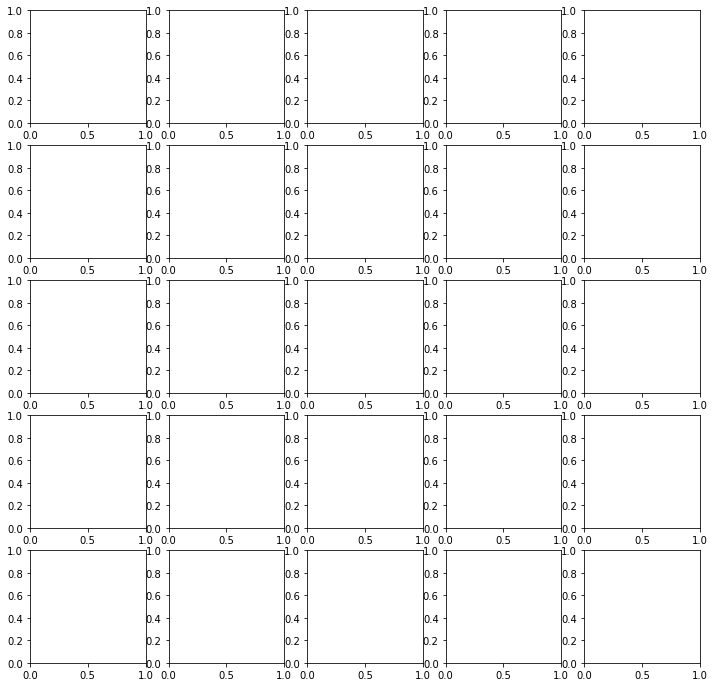

In [0]:
display_image_from_data(df.sample(15))

<class 'numpy.ndarray'>


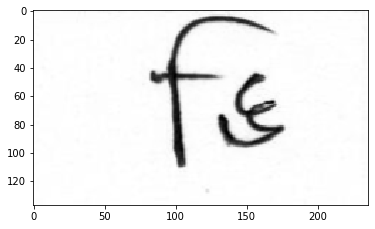

In [0]:
flattened_image = df.iloc[50000].drop('image_id').values.astype(np.uint8)
# unpacked_image = PIL.Image.fromarray(flattened_image.reshape(137, 236))
perfect_image = np.reshape(flattened_image,(137,236))
plt.imshow(perfect_image,'gray')
print(type(perfect_image))
# print(unpacked_image.shape)
# print(flattened_image.shape)

In [0]:
os.listdir()

['class_map.csv',
 'sample_submission.csv',
 'test_image_data_0.parquet',
 'test.csv',
 'test_image_data_1.parquet',
 'test_image_data_2.parquet',
 'test_image_data_3.parquet',
 'train.csv',
 'train_image_data_0.parquet',
 'train_image_data_1.parquet',
 'train_image_data_2.parquet',
 'train_image_data_3.parquet']

In [0]:
df1 = pd.read_csv('train.csv')

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [0]:
from collections import Counter
c = Counter(df1['grapheme'])
print(c)

Counter({'য়ে': 283, 'দ্দা': 178, 'ঘ': 178, 'ঝু': 177, 'বে': 177, 'ফা': 177, 'প্রো': 177, 'র্লি': 177, 'দ্বে': 177, 'স্রা': 177, 'ব্ধ': 176, 'ল্ডো': 176, 'র্জি': 176, 'জ্য': 176, 'ভ': 176, 'চা': 176, 'য়ি': 176, 'ষ্ণ': 176, 'ম্বে': 176, 'ড়ি': 176, 'তৃ': 175, 'গ্ধা': 175, 'ন্দ্রে': 175, 'ভৈ': 175, 'স্টু': 175, 'র্মি': 175, 'ঈ': 175, 'টি': 175, 'ক্তি': 175, 'স্লা': 175, 'ক': 175, 'ড্ডা': 175, 'স্পো': 174, 'র্কি': 174, 'কৃ': 174, 'ত্রী': 174, 'ক্কি': 174, 'স্য': 174, 'ম্পূ': 174, 'প্রু': 174, 'মৃ': 174, 'ন্মি': 174, 'চেঁ': 174, 'ক্রো': 174, 'ল্য': 174, 'ন্নে': 173, 'ড্রো': 173, 'ঢে': 173, 'ক্য': 173, 'ত্নি': 173, 'খে': 173, 'ম': 173, 'জি': 173, 'চো': 173, 'ত্ত্বি': 173, 'র্ধ': 173, 'ড়ী': 173, 'ঝি': 173, 'ঝে': 173, 'চ্ছা': 172, 'যো': 172, 'ধ': 172, 'র্কু': 172, 'র্থ': 172, 'দ্রে': 172, 'স্তা': 172, 'র্ক': 172, 'শ্চা': 172, 'পঁ': 172, 'ক্ষ্মী': 172, 'কা': 172, 'ন্ত্রি': 172, 'শ্লু': 172, 'জে': 172, 'জু': 172, 'ল্কি': 172, 'স্পি': 172, 'মে': 172, 'চৈ': 172, 'র্শ্ব': 172, 'ল্টা': 172, 'র্ব্য': 

NameError: ignored

In [0]:
class_map = pd.read_csv('class_map.csv')
class_map

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র
